# tracé d'une fonction : Potentiel de Lennard-Jones

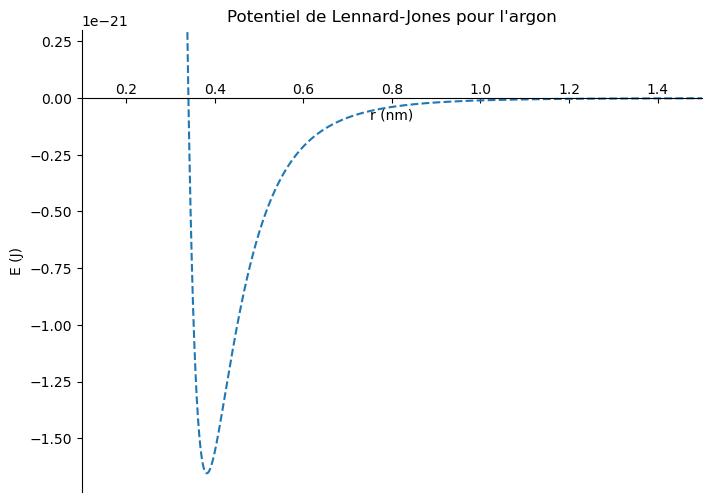

<Figure size 800x600 with 0 Axes>

In [9]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Tracé d'une fonction analytique
"""

# Importation des librairies

import numpy as np
import scipy
import scipy.constants as constants
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definition des fonctions
def Lennard_Jones(d, E0, r):
    """
     E_{LJ}(r) = 4E_0 * ((d/r)**12-(d/r)**6) $$
    d (float) : distance caractéristique du potentiel de Lennard-Jones en nm
    E0 (float) : préfacteur énergétique
    r (float ou ndarray) : distance(s) à laquelle calculer le potentiel de Lennard-Jones
    retourne
    ndarray (ou float) : valeur du potentiel de Lennard-Jones en J
    """
    return 4 * E0 * ((d / r) ** 12 - (d / r) ** 6)


# Programme principal
if __name__ == "__main__":
    dmin = 0.1
    dmax = 1.5
    d = 0.3405
    E0 = 119.8 * constants.k
    rs = np.linspace(dmin, dmax, 1000)
    fvalues = Lennard_Jones(d, E0, rs)

    # Création de la figure avec une taille prédéfinie (en pouce)
    # bien penser à préciser la dimension pour ne pas avoir à faire de redimensionnement ultérieur
    fig = plt.figure(figsize=(8, 6))

    # ajout d'une sous-figure, non indispensable
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])
    fig = plt.figure(figsize=(8, 6))

    # tracé de la fonction
    ax1.plot(rs, fvalues, ls="--")

    # changement des bornes
    ax1.set_ylim(1.05 * np.min(fvalues), 3e-22)
    ax1.set_xlim(dmin, dmax)

    # titre et légendes des axes
    ax1.set_title("Potentiel de Lennard-Jones pour l'argon")
    ax1.set_xlabel("r (nm)")
    ax1.set_ylabel("E (J)")

    # modification des spines pour enlever le cadre
    ax1.spines["bottom"].set_position("zero")
    ax1.spines[["top", "right"]].set_visible(False)
    ax1.spines["left"].set_visible(True)

    # Pour placer les label de l'axe des x au dessus au lieu d'en-dessous
    offset = mpl.transforms.ScaledTranslation(0, 0.25, fig.dpi_scale_trans)
    for label in ax1.xaxis.get_majorticklabels():
        label.set_transform(label.get_transform() + offset)

    # enregistrement de la figure en svg
    plt.savefig("lennard-jones.svg")
    plt.show()

# Tracé à partir d'un fichier

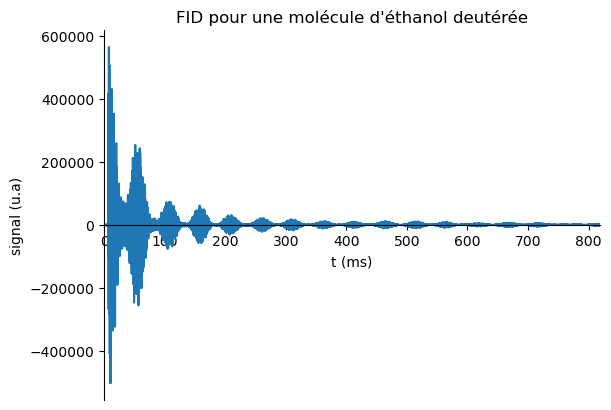

In [66]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Tracé d'une fonction numérique à partir d'un fichier csv
"""

# Importation des librairies

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definition des fonctions


# Programme principal
if __name__ == "__main__":
    data = np.genfromtxt(
        "exo5-fid.csv", delimiter=";", names=["t", "signal"], skip_header=1
    )
    fig = plt.figure(figsize=(8, 6))
    gs = fig.add_gridspec(1, 1)
    ax1 = fig.add_subplot(gs[0, 0])

    ax1.plot(data["t"], data["signal"])
    # sans l'option names :
    """
    data = np.genfromtxt('exo5-fid.csv',delimiter=';',skip_header=1)
    ax1.plot(data[:,0],data[:,1])
    """

    ax1.set_title("FID pour une molécule d'éthanol deutérée")
    ax1.set_xlabel("t (ms)")
    ax1.set_ylabel("signal (u.a)")
    ax1.set_xlim(0, np.max(data["t"]))
    ax1.spines["bottom"].set_position("zero")
    ax1.spines[["top", "right"]].set_visible(False)
    ax1.spines["left"].set_visible(True)

    plt.savefig("fid.png")
    plt.show()

# Graphiques multiples

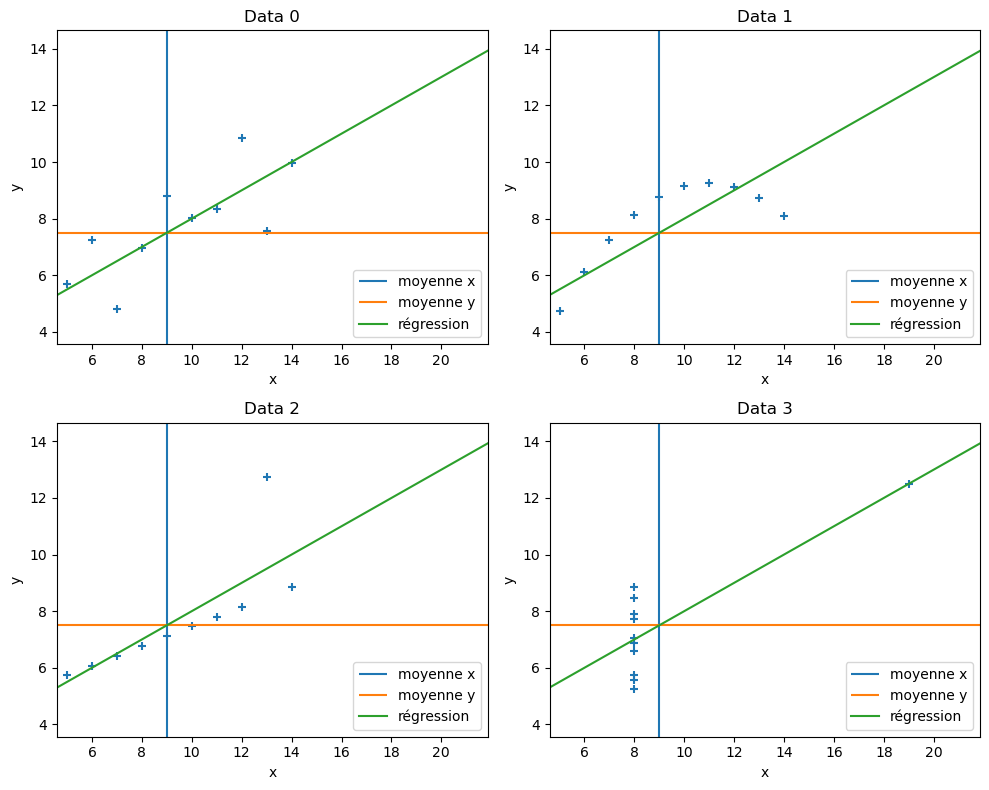

In [6]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Graphique multiples
"""

# Importation des librairies

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# Definition des fonctions


# Programme principal
if __name__ == "__main__":
    # couleur pour les différentes courbes
    cycle = plt.rcParams["axes.prop_cycle"].by_key()["color"]

    # on saute la première ligne pour éviter d'avoir un "nan"
    data2 = np.genfromtxt("exo5-anscombe.dat", delimiter="\t", skip_header=1)
    fig = plt.figure(figsize=(10, 8))
    gs = fig.add_gridspec(2, 2)

    # bornes du graphique
    # on fait un slice du graphique pour réunir tous les x et tous les y des 4 jeux de donnée
    x_full = data2[:, 0::2]
    y_full = data2[:, 1::2]
    xmin, xmax = np.min(x_full) * 1.15, np.max(x_full) * 1.15
    ymin, ymax = np.min(y_full) * 1.15, np.max(y_full) * 1.15

    for i in range(4):
        # on joue sur la quotient et le modulo pour automatiser le positionnement des graphiques
        # par exemple, pour le jeu de données n°3, on finit en coordonnées (1,1)
        row_indix = i // 2  # pour avoir l'indice de la ligne
        col_indix = (
            i % 2
        )  # pour avoir l'indice de la colonne correspondant au jeu de donnée
        axi = fig.add_subplot(gs[row_indix, col_indix])

        # nuage de points sur les colonnes d'indice 2i et 2i+1 qui contiennent x et y pour chaque jeu de données.
        x_data = data2[:, 2 * i]  # colonne paire correspondant au x du jeu de données
        y_data = data2[
            :, 2 * i + 1
        ]  # colonne impaire correspondant au x du jeu de données
        # tracé du nuage de points
        axi.scatter(x_data, y_data, marker="+")

        # tracé de la moyenne en x
        axi.vlines(np.mean(x_data), ymin, ymax, color=cycle[0], label="moyenne x")
        # tracé de la moyenne en y
        axi.hlines(
            np.mean(y_data),
            xmin,
            xmax,
            color=cycle[1],
            label="moyenne y",
        )

        # détermination de la régression linéaire
        coeffs = np.polyfit(x_data, y_data, 1)
        xs = np.linspace(xmin, xmax, 2)
        # calcul des valeurs de y pour les points extrémaux
        ys = np.polyval(coeffs, xs)
        # tracé de la régression
        axi.plot(xs, ys, label="régression", color=cycle[2])

        # ajout de la légende
        axi.legend(loc="lower right")

        # titre et légende des axes
        axi.set_title("Data {}".format(i))
        axi.set_xlabel("x")
        axi.set_ylabel("y")
        # Même abscisse et ordonnée pour tout le monde
        axi.set_xlim(xmin, xmax)
        axi.set_ylim(ymin, ymax)

    plt.tight_layout()
    plt.savefig("anscombe.png")
    plt.show()

# Graphiques en trois dimensions

Pour meshgrid, chacune des coordonnées est stockées dans un tableau de valeur

-5.0
0.0
5.0
6.283185307179586


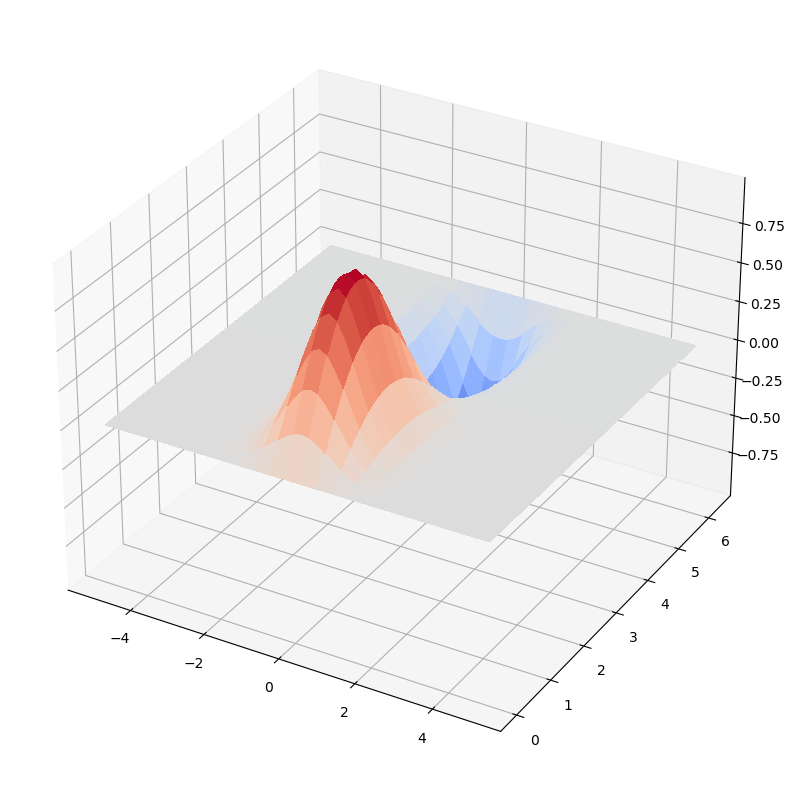

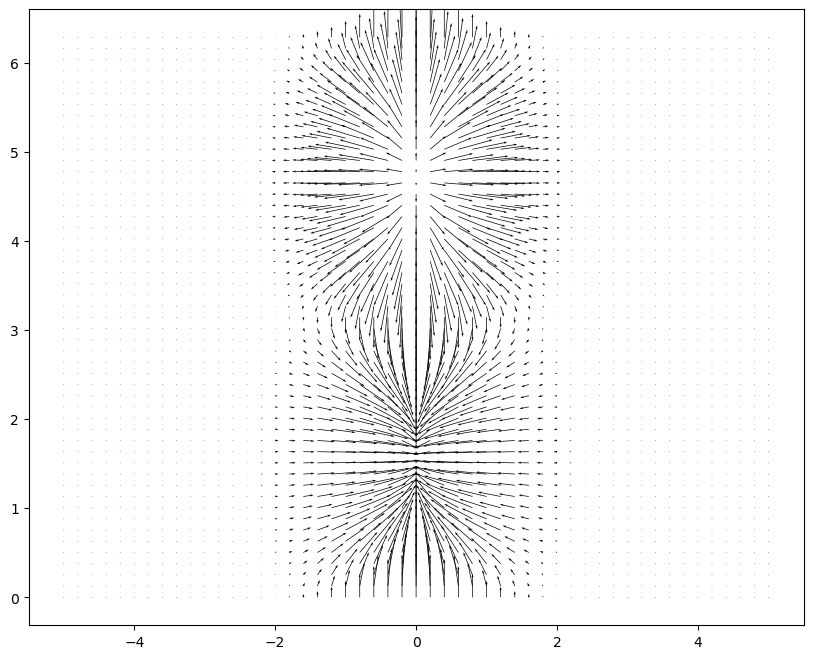

In [2]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

"""
Descriptif du fichier
"""

# Importation des librairies
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm

# Definition des fonctions
def createGrid(xmin, xmax, nx, ymin, ymax, ny):
    """
    Creer une grille uniforme à deux dimensions

      xmin valeur minimale de x
      xmax valeur maximale de x
      nx échantillonage entre xmin et xmax

      idem pour ymin, ymax, ny
    """
    x, dx = np.linspace(xmin, xmax, nx, retstep=True)
    y, dy = np.linspace(ymin, ymax, ny, retstep=True)
    return np.meshgrid(x, y, indexing="ij"), (dx, dy)


def knownFunc(x, y):
    """
    fonction f(x,y)= exp(-x^2)*sin(y)
    x,y arrays retourné par meshgrid
    """
    return np.exp(-(x**2)) * np.sin(y)


# Programme principal
if __name__ == "__main__":
    # print(createGrid(-5, 5, 50, 0, 2*np.pi, 50) )
    nRows = 3
    nCols = 3
    grid, delta = createGrid(-5, 5, 51, 0, 2 * np.pi, 51)
    xx, yy = grid

    # On affiche les coordonnées du premier point.
    print(grid[0][0, 0])  # x
    print(grid[1][0, 0])  # y

    # On affiche les coordonnées du dernier point.
    print(grid[0][-1, -1])  # x
    print(grid[1][-1, -1])  # y

    # Calcul des valeurs de la fonction
    f = knownFunc(xx, yy)
    # calcul du gradient
    grad = np.gradient(f, delta[0], delta[1], edge_order=2)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(projection="3d")
    # tracé de la figure en 3D
    surf = ax.plot_surface(xx, yy, f, cmap=cm.coolwarm, linewidth=0, antialiased=False)
    plt.tight_layout()
    plt.show()

    fig = plt.figure(figsize=(10, 8))
    surf = plt.quiver(xx, yy, grad[0], grad[1], width=0.0009)
    plt.savefig("func-grad.png")
    plt.show()